#### See overview of the problem in https://github.com/jroccal/feature_engineering/blob/main/amex-fe1-overview-s-feature-analysis.ipynb

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
/kaggle/input/amex-data-integer-dtypes-parquet-format/train.parquet
/kaggle/input/amex-data-integer-dtypes-parquet-format/test.parquet


In [6]:
import gc
import seaborn as sns
from pathlib import Path

path_amex_csv = Path('/kaggle/input/amex-default-prediction/')
path_amex_parquet = Path('/kaggle/input/amex-data-integer-dtypes-parquet-format/')

In [7]:
%%time
df_labels_train = pd.read_csv(path_amex_csv / 'train_labels.csv', index_col='customer_ID')

CPU times: user 688 ms, sys: 101 ms, total: 789 ms
Wall time: 1.14 s


In [8]:
%%time
df_data_train_parquet = pd.read_parquet(path_amex_parquet / 'train.parquet')

CPU times: user 9.49 s, sys: 8.2 s, total: 17.7 s
Wall time: 19.2 s


In [9]:
print(df_data_train_parquet.shape)
print(df_labels_train.shape)
categorical_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

(5531451, 190)
(458913, 1)


# 1. Check Samples and Date

In [10]:
df_custID_date = df_data_train_parquet[['customer_ID', 'S_2']]
print(df_custID_date.shape)
gc.collect()

(5531451, 2)


46

In [11]:
# Analyzing the dates
df_max_date = df_custID_date.groupby('customer_ID').max()
df_min_date = df_custID_date.groupby('customer_ID').min()
df_diff_date = (pd.to_datetime(df_max_date['S_2']) - pd.to_datetime(df_min_date['S_2'])).map(lambda x: x.days)
display(df_diff_date.sort_values().iloc[0:10])
display(df_diff_date.sort_values().iloc[-10:])
print('mounthly records for customers with 0 and 1 labels ', 395/30)
gc.collect()

customer_ID
3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7    0
908c1f0eb1c27bb6ef7f261139b61bcb157fe3bb08f66c58b64aa3b9859e4899    0
e2030098efd217b4ca24bb5b31abf09788fbbdb6c45eaedd991d3df950d7efd1    0
ba7f2bee48893f4ad2f9b52967c8ab5b7f25c4119f095e8f3f9072200c8a3808    0
63fa1dae6ae716a7a5d1455b284681588b161cd35a03e73c6219bba5cd1c2fb5    0
37007a88976b00c3b58ec5dd4984e8f25858db945b277c80660fe60e7aa0aa18    0
722bc5f514bf3aed79a2f8f33fbeae1fc9316b458e30771f884bcd72036e0163    0
3b7149c497417ce353701aa7c5a58189b5b1e791e9eb398b7c8460c97098e93d    0
bd1b21a5da2f59814a24ac05f907b4130fa6a5223756c6ed217eb707851da654    0
bd1b37408014dc66559401efffa30318e0d9d886bf412127fb81741fca9f10ba    0
Name: S_2, dtype: int64

customer_ID
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f832420a84242b0aad2c    395
16f8cf9065d8cf81f3a7ee6b4b326cf505a3fae4c8e56bb3f7abfc9a2f509834    395
92cef0a74b98874a77902f6288f9b8ed8a5131634581d0f93518b42207a73f7f    395
25ada08859775be120ce91d373c241862c778191a22175d2bcedf4d903291652    395
0438c17fd238859f6660ece597d69fd197b3e1a9763f96571bfd169e0d58bdc6    395
b6f4356177f134dc89792ea75277a87977b311a1df195254acc05bbb152803e3    395
1d3f6960593d9f3f73d13aac534e0d21d59aa0b1ccabdabe94dbcff84a18d92e    395
af517228480a925e23663ee0c8b670236349ff386e1a8c8c4dbc90080aca04b3    395
4bed06698e81be59ed794b5838133c9d370af278badfb026d55d7c2a9ad84c68    395
a60b33131e236d9522a21b7af82afe0cefb9f049aa6e4fe006f7f071c5d73e80    395
Name: S_2, dtype: int64

mounthly records for customers with 0 and 1 labels  13.166666666666666


0

Text(0.5, 1.0, 'Numero of days for each customer')

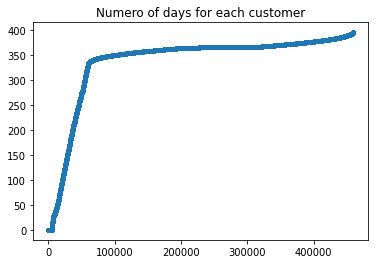

In [12]:
ax = df_diff_date.sort_values().reset_index()['S_2'].plot(style='.')
ax.set_title('Numero of days for each customer')

In [13]:
df_custID_date.set_index('customer_ID', inplace=True)
print(df_custID_date.loc['3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7']) #1 day 
print()
print(df_custID_date.loc['2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f832420a84242b0aad2c']) #395 days
df_samples_by_id = df_custID_date.groupby(level=0).count()
df_samples_by_id.columns = ['Num_Dates']
display(df_samples_by_id.sort_values('Num_Dates').iloc[0:10,])
display(df_samples_by_id.sort_values('Num_Dates').iloc[-10:,])
gc.collect()

S_2    2018-03-31
Name: 3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7, dtype: object

                                                           S_2
customer_ID                                                   
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-03-01
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-04-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-05-01
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-06-29
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-07-24
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-08-31
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-09-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-10-11
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-11-24
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-12-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2018-01-02
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2018-02-16
2f4def50b25fc

,Num_Dates
customer_ID,
268ba31cb8ca378b7355e45ee2d476c8f245f5d7f7c5ac8d2220da790692354d,1
398b2284afa95bcb5e45b9d0a12b3b9489417c7e85e3d4201949126dea87dfb2,1
f6a5f41c78d34e3283f4a5f1ab5dd84195783af511fc3a2b450e459a1eca6371,1
914821e33ef409f4f2c3b1e82c21d69bf18d5c7f8a3bd470e8f32eade782440c,1
d7eac493c711f26e608cc619384fc0eb6df04859da94bb5bfde386b75eb4c14f,1
be7a4f53b7f695c08c1364ef8b981f0bbea32bdfa7cddcf7738a78096d8e3a05,1
353ba249166e0506a004fd474275f8c3d68b9670a786f07a61c58d866895a2e3,1
a1c70f57d0ae651ac7e0253523ec43998d3950201235d22554e79f2c2f24334d,1
270048c153b02328383135b66e6f0ec336087a0f367348d70d00057fd515c4e8,1


,Num_Dates
customer_ID,
5c6b5ae2c487197e8cbc2d7663dc84878bd09c7fdb9699c0492a3cd64f352cef,13
5c6b3fc73f9c3481648a9b9750c3785c3218a0c67fd630e710641ad402d13c9f,13
5c6aef8aac83c5114abd735449d6270d8c9c4db4af3fa56ef3226ce9cffee4ff,13
5c6aacbaefc8818b2d3604bad2cc449ac3b289b1f524f731d5e1228b675b900c,13
5c6a594f885690556b6f77946f996bc03b9ed62623f7499f06991df8af1b5b20,13
5c6a469918b7badb212b6f33feb344096202679a44473295c4cb54a295801d35,13
5c6a423106d22db96000f5c02dde5de937b18ea1d653ccdf19bba6777a54aafb,13
5c6a3483b4bb775550043ae126163ec1d9216dececfcaf20502e1a4599c333b8,13
5c6bded8a6ba8c94ad66e6210d58d5008813c5192b740e1ef0d0476151d02ca5,13


0

In [20]:
df_customers_by_sample  = df_samples_by_id.reset_index().groupby('Num_Dates').count()
df_customers_by_sample

,customer_ID
Num_Dates,
1,5120
2,6098
3,5778
4,4673
5,4671
6,5515
7,5198
8,6110
9,6411


# 2. Check Features

In [27]:
import matplotlib.pyplot as plt
color = sns.color_palette()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [15]:
def get_features(all_features):
    dict_feat = {'P':[], 'S':[], 'D':[], 'B':[], 'R':[]}
    for feat in all_features:
        name, _ = feat.split('_')
        if name in dict_feat:
            dict_feat[name].append(feat)
    return dict_feat

all_features = df_data_train_parquet.columns
dict_features = get_features(list(all_features))
print('P-payment', len(dict_features['P']))
print('S-spend', len(dict_features['S']))
print('D-delinquency', len(dict_features['D']))
print('B-balance', len(dict_features['B']))
print('R-risk', len(dict_features['R']))

P-payment 3
S-spend 22
D-delinquency 96
B-balance 40
R-risk 28


In [16]:
df_data_B_features = df_data_train_parquet[['customer_ID']+dict_features['B']]
df_data_B_features.set_index('customer_ID', inplace=True)

df_data_B_features = df_samples_by_id.join(df_data_B_features, how='inner') #join the num_samples by id
df_data_B_features = df_labels_train.join(df_data_B_features, how='inner') #join the labels
print(df_data_B_features.shape)
display(df_data_B_features.iloc[0:3])
gc.collect()
gc.collect()

(5531451, 42)


,target,Num_Dates,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,...,B_31,B_32,B_33,B_36,B_37,B_38,B_39,B_40,B_41,B_42
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,0.008724,1.006838,0.004709,6,0.170600,0.063902,0.059416,0.0,...,1,0,1,0.009968,0.004572,2,NaN,0.210060,0,NaN
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,0.004923,1.000653,0.002714,5,0.113239,0.065261,0.057744,0.0,...,1,0,1,0.003921,0.004654,2,NaN,0.184093,0,NaN
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,0.021655,1.009672,0.009423,5,0.060492,0.066982,0.056647,0.0,...,1,0,1,0.001264,0.019176,2,NaN,0.154837,0,NaN


0

In [18]:
## Select the customers with 13 samples to make the analysis
data = df_data_B_features[df_data_B_features['Num_Dates'] == 13]
data.shape

(5018442, 42)

In [21]:
# check the number of samples: number_customers*number_samples(13)
if df_customers_by_sample.loc[13].values[0]*13 == data.shape[0]:
    print(True)

print("The group of customers with 13 samples are:",df_customers_by_sample.loc[13].values[0], ' with 13 samples is a total:', 
      df_customers_by_sample.loc[13].values[0]*13,'\n', 'which represent ',(df_customers_by_sample.loc[13].values[0]*13)/5531451, 
      '% of the total of samples in the database, that is 5531451')    

True
The group of customers with 13 samples are: 386034  with 13 samples is a total: 5018442 
 which represent  0.907255980392848 % of the total of samples in the database, that is 5531451


### Features Analysis

In [23]:
def boxhist(column, df, figsize=(10,5)):
    variable = df[column].values 
    f, (ax_box, ax_hist) = plt.subplots(2, figsize=figsize, sharex=True, gridspec_kw= {"height_ratios": (1.0, 2)})
    mean=np.mean(variable)
    median=np.median(variable)
    
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.set_title(column)
    
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    
    plt.title(column, fontsize=10, loc="center")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()
    
def type_and_nulls(df):
    df_type = pd.concat([pd.DataFrame(df.dtypes), df.isnull().sum().to_frame().rename(columns={0:'nulls'})], axis=1)
    display(df_type)
    display(df.dtypes.value_counts())
    not_nulls = list((df_type[df_type['nulls']==0]).index)
    print('Not null features: ', not_nulls)
    return not_nulls    

def plot_transformations(data, column, min_value, limit_value=1, with_log=True, with_log_slope=True, slope=1e-4):
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    print('data type:', data[[column]].dtypes.values)
    print('total samples:', data[[column]].shape[0], ',  num of extreme values:', np.sum(data[[column]]>limit_value).values)
    print('With limit value of limit value of ',limit_value, ' that represent ', 
          np.sum(data[[column]]>limit_value).values[0]/data[[column]].shape[0], '% the data')
    display(data[[column]][data[column]<=limit_value].describe().T)
    data[column][data[column]<=limit_value].hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[0])
    ax[0].set_title('With limit value of '+str(limit_value))
    
    if min_value>0:
        print('With log transformation')
        display(np.log(data[[column]]).describe().T)
        np.log(data[[column]]).hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[1])
        ax[1].set_title('With log transformation')
    
    if with_log_slope:
        print('With log transformation and ', str(slope),' as a slope value')
        display(np.log(data[[column]]+1e-4).describe().T)
        np.log(data[[column]]+1e-4).hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[2])
        ax[2].set_title('With log transformation and '+ str(slope)+' as a slope value')
        
        
def plot_discrete_data(data, column):        
    data[[column]].plot(style='.')
    data[[column]].sort_values(column).plot(style='.')

    tmp = data[['target', column]][data[column]==0]
    print('0s in the same position than the target' ,np.sum((tmp['target']+tmp[column]) == 0))
    print('correlation with \n' ,data[['target', column]].corr())
    print('value counts:\n', data[column].value_counts())        

In [24]:
not_null_features = type_and_nulls(data)
gc.collect()

,0,nulls
target,int64,0
Num_Dates,int64,0
B_1,float32,0
B_2,float32,193
B_3,float32,193
B_4,int16,0
B_5,float32,0
B_6,float32,0
B_7,float32,0
B_8,float32,11723


float32    29
int8       10
int64       2
int16       1
dtype: int64

Not null features:  ['target', 'Num_Dates', 'B_1', 'B_4', 'B_5', 'B_6', 'B_7', 'B_9', 'B_10', 'B_11', 'B_12', 'B_14', 'B_16', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_28', 'B_30', 'B_31', 'B_32', 'B_33', 'B_36', 'B_38', 'B_41']


631

array([[<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'Num_Dates'}>,
        <AxesSubplot:title={'center':'B_1'}>,
        <AxesSubplot:title={'center':'B_4'}>,
        <AxesSubplot:title={'center':'B_5'}>],
       [<AxesSubplot:title={'center':'B_6'}>,
        <AxesSubplot:title={'center':'B_7'}>,
        <AxesSubplot:title={'center':'B_9'}>,
        <AxesSubplot:title={'center':'B_10'}>,
        <AxesSubplot:title={'center':'B_11'}>],
       [<AxesSubplot:title={'center':'B_12'}>,
        <AxesSubplot:title={'center':'B_14'}>,
        <AxesSubplot:title={'center':'B_16'}>,
        <AxesSubplot:title={'center':'B_18'}>,
        <AxesSubplot:title={'center':'B_19'}>],
       [<AxesSubplot:title={'center':'B_20'}>,
        <AxesSubplot:title={'center':'B_21'}>,
        <AxesSubplot:title={'center':'B_22'}>,
        <AxesSubplot:title={'center':'B_23'}>,
        <AxesSubplot:title={'center':'B_24'}>],
       [<AxesSubplot:title={'center':'B_28'}>,
        

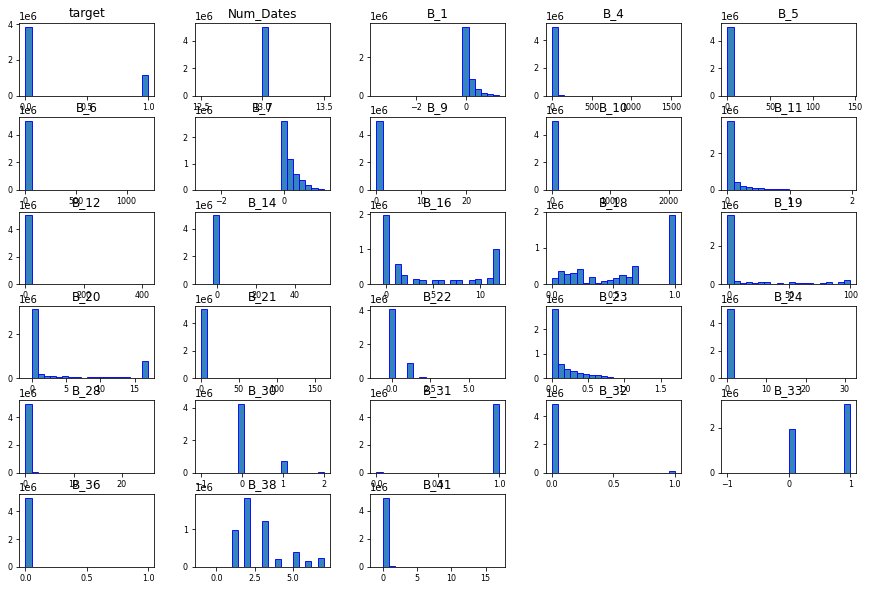

In [25]:
## features distribution
data[not_null_features].hist(figsize=(15,10), bins=20, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)

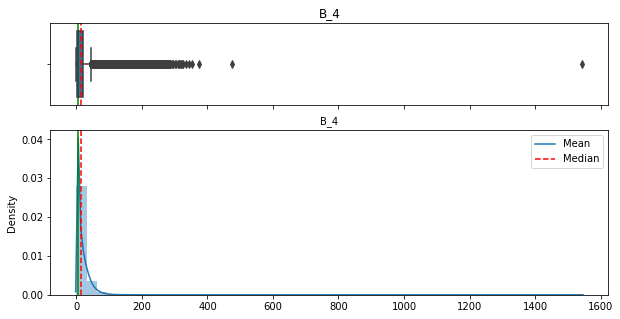

,count,mean,std,min,25%,50%,75%,max
B_4,5018442.0,13.248665,17.593491,0.0,2.0,6.0,19.0,1544.0


In [28]:
column = 'B_4'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

data type: [dtype('int16')]
total samples: 5018442 ,  num of extreme values: [2]
With limit value of limit value of  400  that represent  3.9853006172035067e-07 % the data


,count,mean,std,min,25%,50%,75%,max
B_4,5018440.0,13.248268,17.579011,0.0,2.0,6.0,19.0,374.0


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_4,5018442.0,0.49321,4.075701,-9.21034,0.693197,1.791776,2.944444,7.342132


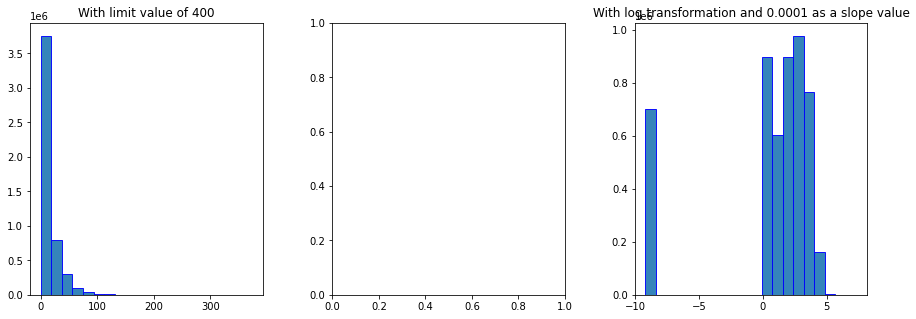

In [32]:
plot_transformations(data, column, min_value, limit_value=400, with_log_slope=True, slope=1e-4)

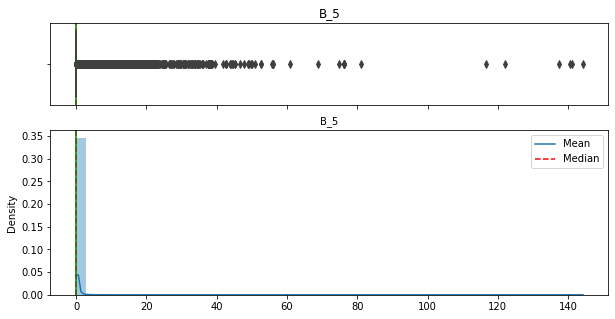

,count,mean,std,min,25%,50%,75%,max
B_5,5018442.0,0.085638,0.393825,2.804822e-11,0.007454,0.016141,0.057524,144.207016


In [33]:
column = 'B_5'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [21]
With limit value of limit value of  50  that represent  4.184565648063682e-06 % the data


,count,mean,std,min,25%,50%,75%,max
B_5,5018421.0,0.085286,0.347761,2.804822e-11,0.007454,0.016141,0.057523,49.663643


With log transformation


,count,mean,std,min,25%,50%,75%,max
B_5,5018442.0,-3.891861,1.615581,-24.297096,-4.899019,-4.126363,-2.855549,4.97125


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_5,5018442.0,-3.873812,1.582672,-9.21034,-4.885693,-4.120187,-2.853812,4.971251


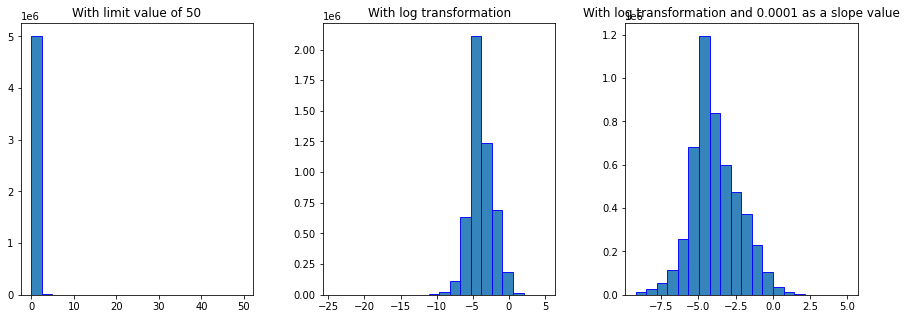

In [34]:
plot_transformations(data, column, min_value, limit_value=50, with_log_slope=True, slope=1e-4)

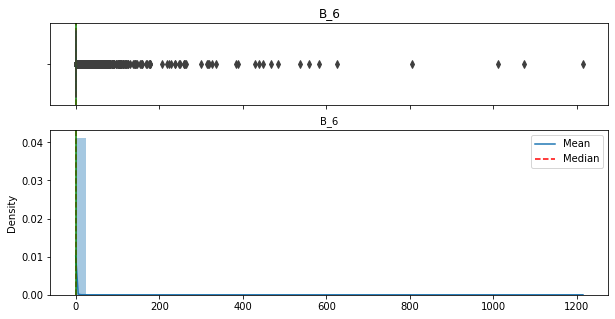

,count,mean,std,min,25%,50%,75%,max
B_6,5018442.0,0.148399,1.461818,-0.005178,0.020077,0.082893,0.192872,1214.516968


80927

In [35]:
column = 'B_6'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [13]
With limit value of limit value of  400  that represent  2.5904454011822794e-06 % the data


,count,mean,std,min,25%,50%,75%,max
B_6,5018429.0,0.14667,0.900245,-0.005178,0.020077,0.082893,0.192871,387.336517


With log transformation and  0.005278168416023255  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_6,5012671.0,-2.775762,1.372173,-16.321942,-3.898791,-2.485399,-1.644941,7.102102


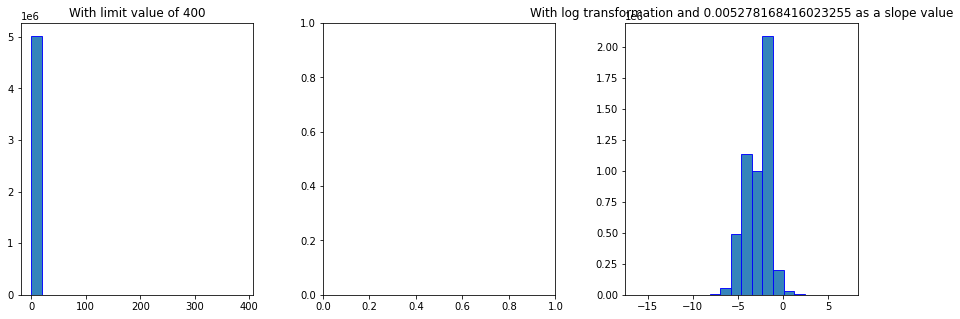

In [37]:
plot_transformations(data, column, min_value, limit_value=400, with_log_slope=True, slope=np.abs(min_value)+1e-4)

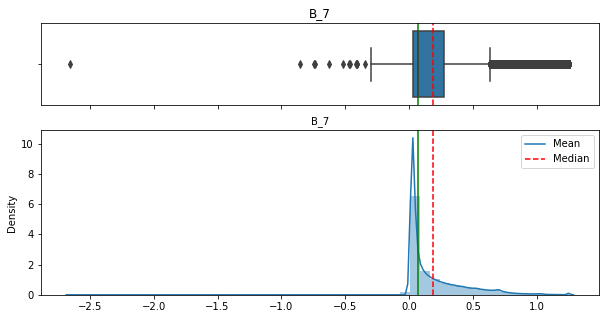

,count,mean,std,min,25%,50%,75%,max
B_7,5018442.0,0.184281,0.229398,-2.652749,0.027843,0.071675,0.269631,1.25275


46593

In [38]:
column = 'B_7'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [5014854]
With limit value of limit value of  0  that represent  0.9992850370692737 % the data


,count,mean,std,min,25%,50%,75%,max
B_7,3588.0,-0.015294,0.058861,-2.652749,-0.013893,-0.005788,-0.001954,-0.000002


With log transformation and  2.6528485847473147  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_7,5014918.0,-2.520515,1.40376,-15.06309,-3.576311,-2.632286,-1.309524,0.225421


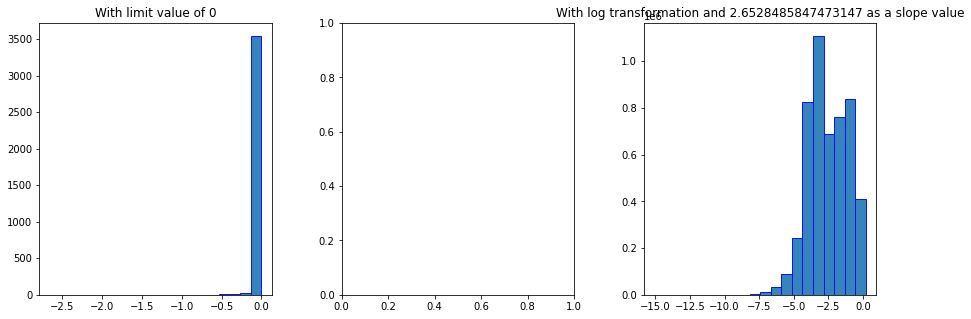

In [39]:
plot_transformations(data, column, min_value, limit_value=0, with_log_slope=True, slope=np.abs(min_value)+1e-4)

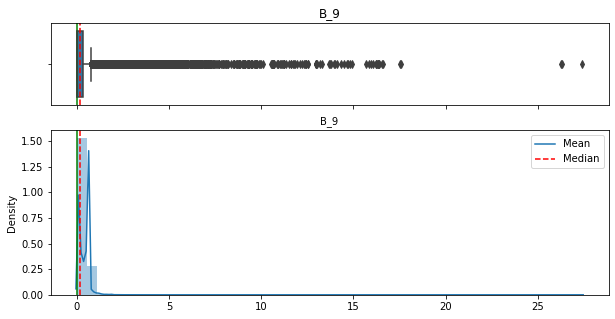

,count,mean,std,min,25%,50%,75%,max
B_9,5018442.0,0.182019,0.281756,6.726070e-09,0.005554,0.020347,0.324972,27.424858


19792

In [40]:
column = 'B_9'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [18]
With limit value of limit value of  15  that represent  3.5867705554831558e-06 % the data


,count,mean,std,min,25%,50%,75%,max
B_9,5018424.0,0.181954,0.279607,6.726070e-09,0.005554,0.020346,0.32497,14.90523


With log transformation


,count,mean,std,min,25%,50%,75%,max
B_9,5018442.0,-3.487932,2.259003,-18.817274,-5.193177,-3.894845,-1.124018,3.31145


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_9,5018442.0,-3.461912,2.213728,-9.210273,-5.175334,-3.889943,-1.12371,3.311453


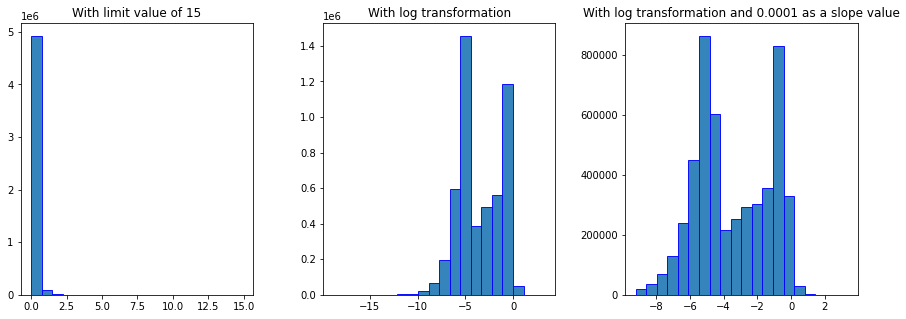

In [41]:
plot_transformations(data, column, min_value, limit_value=15, with_log_slope=True, slope=1e-4)

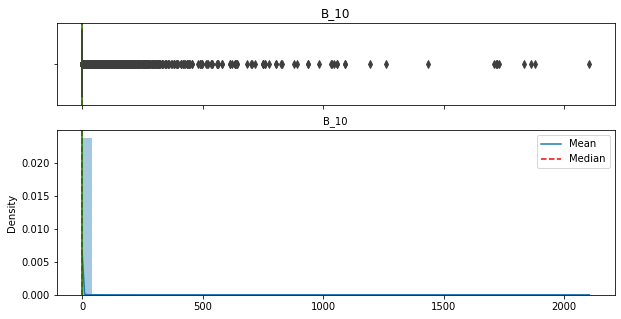

,count,mean,std,min,25%,50%,75%,max
B_10,5018442.0,0.229766,4.161684,-0.002958,0.029276,0.116674,0.295793,2103.255859


20632

In [42]:
column = 'B_10'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [49075]
With limit value of limit value of  1.0  that represent  0.009778931389463104 % the data


,count,mean,std,min,25%,50%,75%,max
B_10,4969367.0,0.158338,0.138309,-0.002958,0.02892,0.112747,0.295529,1.0


With log transformation and  0.0030584814328700302  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_10,5013099.0,-2.404187,1.307068,-14.343608,-3.523675,-2.143304,-1.217726,7.651242


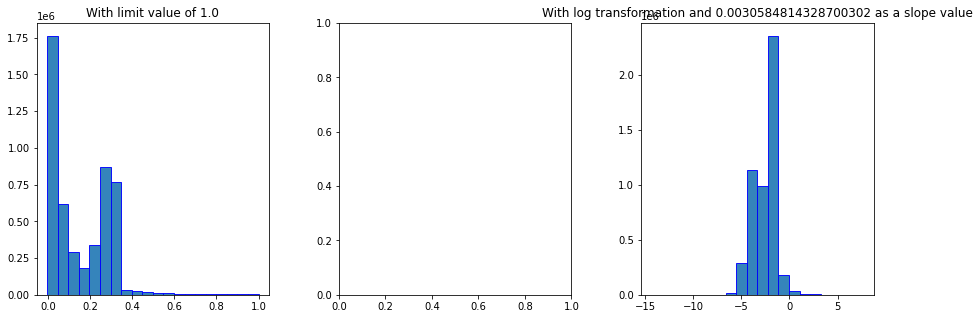

In [46]:
plot_transformations(data, column, min_value, limit_value=1.0, with_log_slope=True, slope=np.abs(min_value)+1e-4)

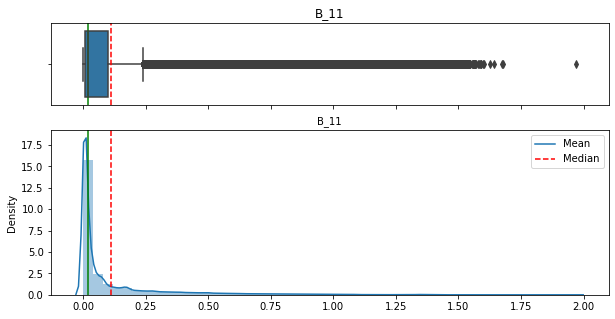

,count,mean,std,min,25%,50%,75%,max
B_11,5018442.0,0.110262,0.20735,2.366277e-08,0.006481,0.018317,0.100509,1.970375


41728

In [47]:
column = 'B_11'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [0]
With limit value of limit value of  2.0  that represent  0.0 % the data


,count,mean,std,min,25%,50%,75%,max
B_11,5018442.0,0.110262,0.20735,2.366277e-08,0.006481,0.018317,0.100509,1.970375


With log transformation


,count,mean,std,min,25%,50%,75%,max
B_11,5018442.0,-3.738616,1.880422,-17.559362,-5.038909,-3.999905,-2.297513,0.678224


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_11,5018442.0,-3.717581,1.843024,-9.210104,-5.023596,-3.994461,-2.296518,0.678275


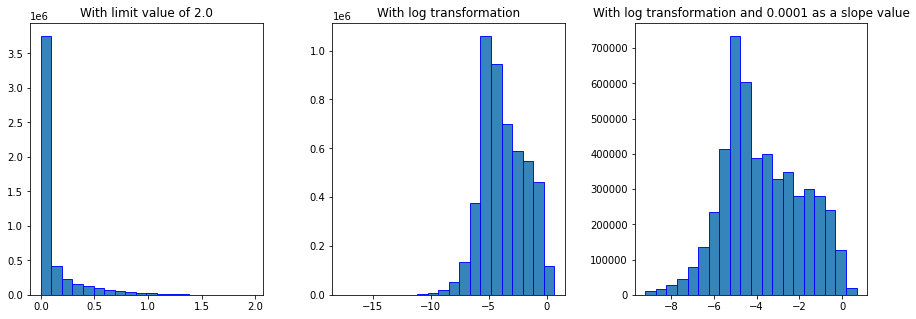

In [49]:
plot_transformations(data, column, min_value, limit_value=2.0, with_log_slope=True, slope=1e-4)

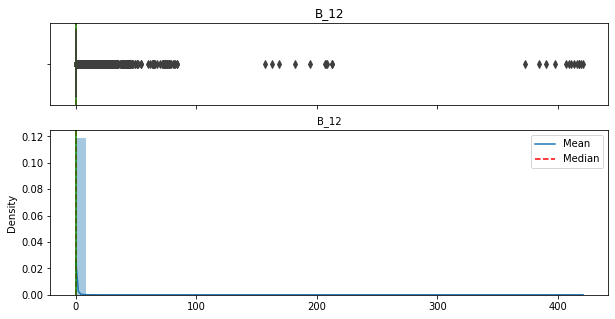

,count,mean,std,min,25%,50%,75%,max
B_12,5018442.0,0.095177,0.839822,3.343624e-08,0.011138,0.02113,0.07267,420.748993


32346

In [50]:
column = 'B_12'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [23]
With limit value of limit value of  100  that represent  4.583095709784033e-06 % the data


,count,mean,std,min,25%,50%,75%,max
B_12,5018419.0,0.093746,0.452742,3.343624e-08,0.011138,0.02113,0.072669,83.483627


With log transformation


,count,mean,std,min,25%,50%,75%,max
B_12,5018442.0,-3.516758,1.323698,-17.213625,-4.497391,-3.857039,-2.621824,6.042037


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_12,5018442.0,-3.509693,1.315058,-9.210006,-4.488452,-3.852318,-2.620449,6.042037


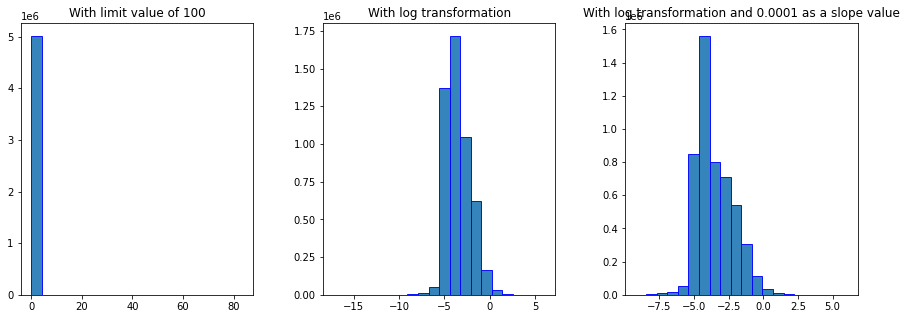

In [51]:
plot_transformations(data, column, min_value, limit_value=100, with_log_slope=True, slope=1e-4)

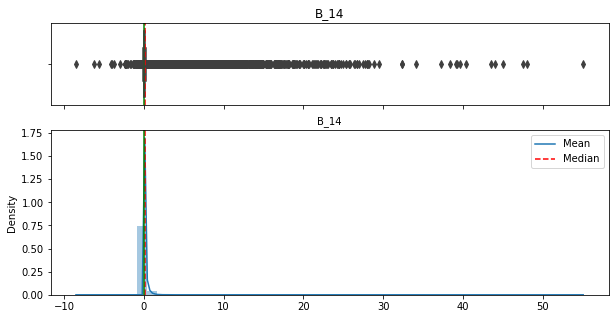

,count,mean,std,min,25%,50%,75%,max
B_14,5018442.0,0.103573,0.284828,-8.469853,0.008026,0.02912,0.104301,55.011517


21402

In [52]:
column = 'B_14'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [71]
With limit value of limit value of  20  that represent  1.4147817191072449e-05 % the data


,count,mean,std,min,25%,50%,75%,max
B_14,5018371.0,0.103185,0.263849,-8.469853,0.008026,0.029119,0.104296,19.90974


With log transformation and  8.469953401184082  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_14,5007294.0,-3.53872,1.681209,-16.174484,-4.806898,-3.527847,-2.256681,4.007544


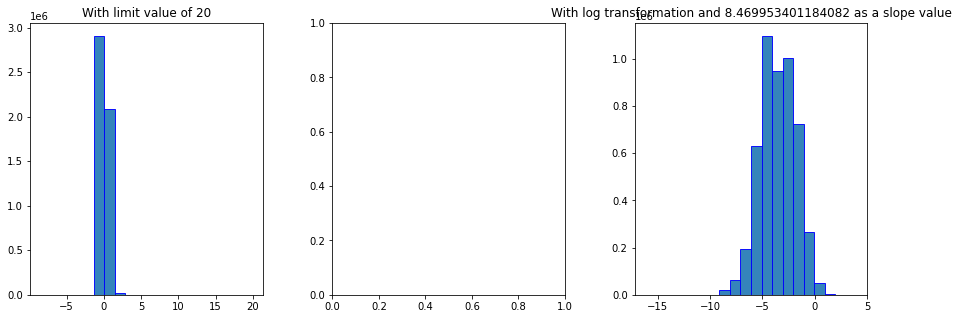

In [53]:
plot_transformations(data, column, min_value, limit_value=20, with_log_slope=True, slope=np.abs(min_value)+1e-4)

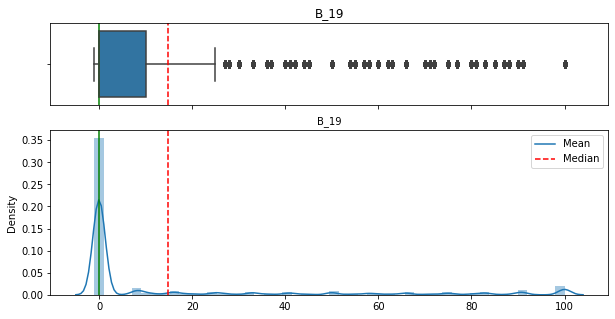

,count,mean,std,min,25%,50%,75%,max
B_19,5018442.0,14.737154,29.088808,-1.0,0.0,0.0,10.0,100.0


31127

In [54]:
column = 'B_19'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 3181541
correlation with 
           target      B_19
target  1.000000  0.413988
B_19    0.413988  1.000000
value counts:
  0      3601213
 100     204077
 8       120612
 16       83414
 50       78900
 33       73241
 25       72337
 91       66468
 66       61703
 83       57728
 75       53509
 41       46511
 58       42941
 9        36308
 90       32975
 10       22907
 20       22794
 18       21698
 27       17944
 81       17465
 11       17408
 36       16692
 40       16455
 80       15823
 45       15422
 60       15308
 72       15161
 63       14891
 12       14720
 54       14668
 14       12944
 30       11728
 22       11080
 70       10883
 55        8998
 44        8864
 37        8216
 28        8120
 77        8025
 62        7173
 42        6511
 57        5636
 88        5373
 71        5178
 87        4245
 85        3982
-1          193
Name: B_19, dtype: int64


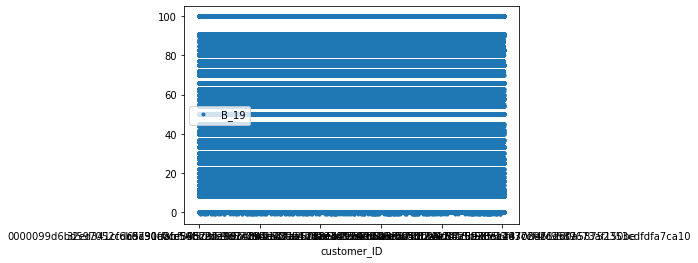

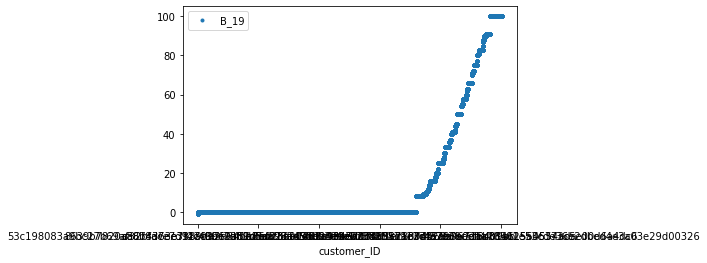

In [56]:
plot_discrete_data(data, column)

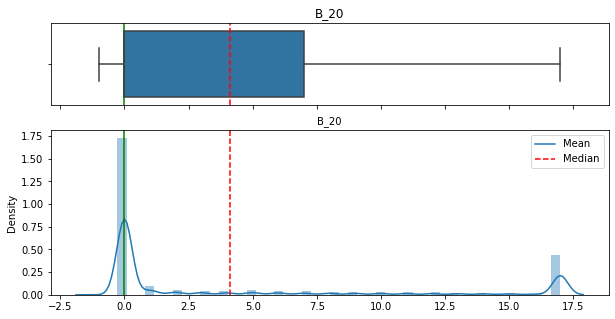

,count,mean,std,min,25%,50%,75%,max
B_20,5018442.0,4.114695,6.517167,-1.0,0.0,0.0,7.0,17.0


23461

In [57]:
column = 'B_20'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 2879556
correlation with 
           target      B_20
target  1.000000  0.418743
B_20    0.418743  1.000000
value counts:
  0     3126597
 17     793581
 1      177254
 2      103359
 5       89139
 3       85250
 6       76258
 4       76237
 7       66209
 8       62064
 9       58670
 10      55386
 11      51697
 12      47709
 13      44503
 14      41108
 15      37980
 16      25248
-1         193
Name: B_20, dtype: int64


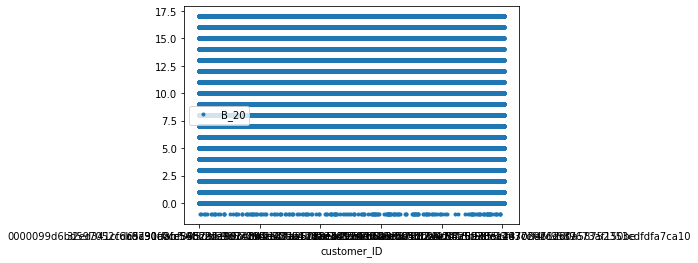

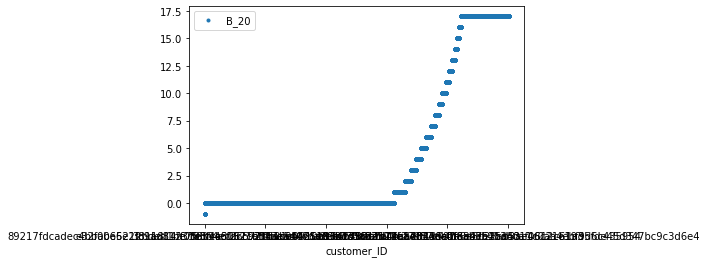

In [59]:
plot_discrete_data(data, column)

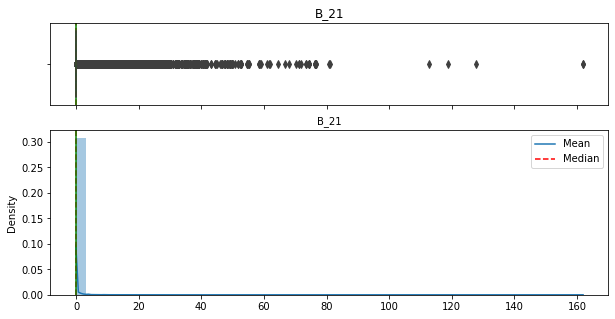

,count,mean,std,min,25%,50%,75%,max
B_21,5018442.0,0.040727,0.569664,4.426753e-09,0.002543,0.005087,0.007629,161.85997


26576

In [60]:
column = 'B_21'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [29]
With limit value of limit value of  60  that represent  5.778685894945085e-06 % the data


,count,mean,std,min,25%,50%,75%,max
B_21,5018413.0,0.040245,0.529551,4.426753e-09,0.002543,0.005087,0.007629,59.053272


With log transformation


,count,mean,std,min,25%,50%,75%,max
B_21,5018442.0,-5.512299,1.2302,-19.2356,-5.974228,-5.281057,-4.875819,5.086731


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_21,5018442.0,-5.457175,1.136702,-9.210296,-5.935665,-5.26159,-4.862796,5.086732


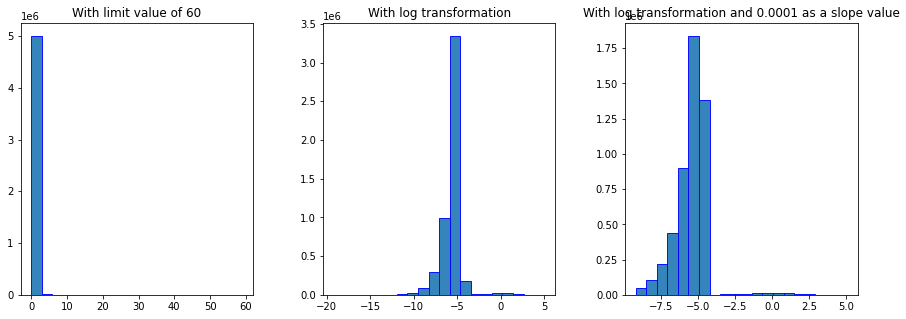

In [61]:
plot_transformations(data, column, min_value, limit_value=60, with_log_slope=True, slope=1e-4)

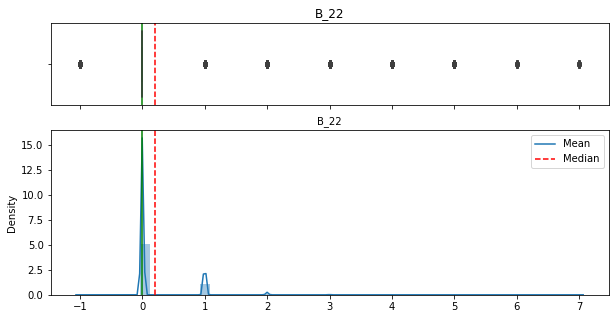

,count,mean,std,min,25%,50%,75%,max
B_22,5018442.0,0.208142,0.450076,-1.0,0.0,0.0,0.0,7.0


21772

In [62]:
column = 'B_22'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 3458486
correlation with 
           target      B_22
target  1.000000  0.393253
B_22    0.393253  1.000000
value counts:
  0    4056596
 1     888137
 2      65464
 3       6800
 4       1041
-1        193
 5        172
 6         20
 7         19
Name: B_22, dtype: int64


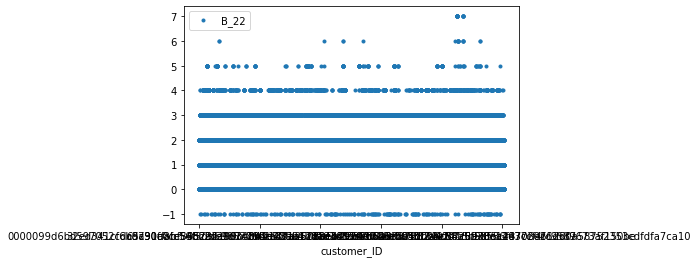

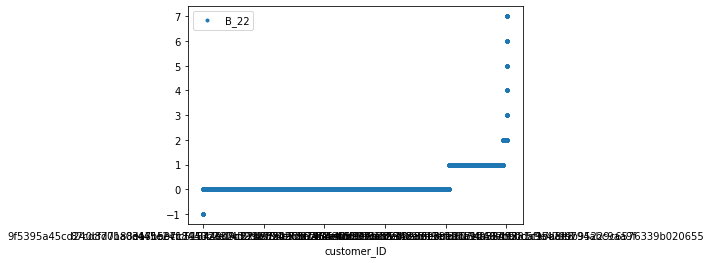

In [63]:
plot_discrete_data(data, column)

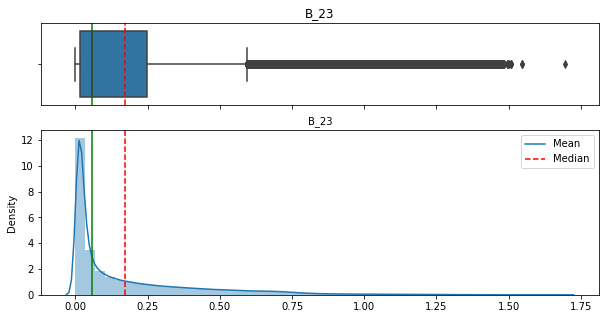

,count,mean,std,min,25%,50%,75%,max
B_23,5018442.0,0.170642,0.229371,4.352963e-08,0.017133,0.056342,0.247534,1.693098


16326

In [64]:
column = 'B_23'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [0]
With limit value of limit value of  2  that represent  0.0 % the data


,count,mean,std,min,25%,50%,75%,max
B_23,5018442.0,0.170642,0.229371,4.352963e-08,0.017133,0.056342,0.247534,1.693098


With log transformation


,count,mean,std,min,25%,50%,75%,max
B_23,5018442.0,-2.813489,1.623051,-16.949823,-4.066744,-2.87631,-1.396208,0.52656


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_23,5018442.0,-2.806588,1.609665,-9.209905,-4.060924,-2.874537,-1.395804,0.526619


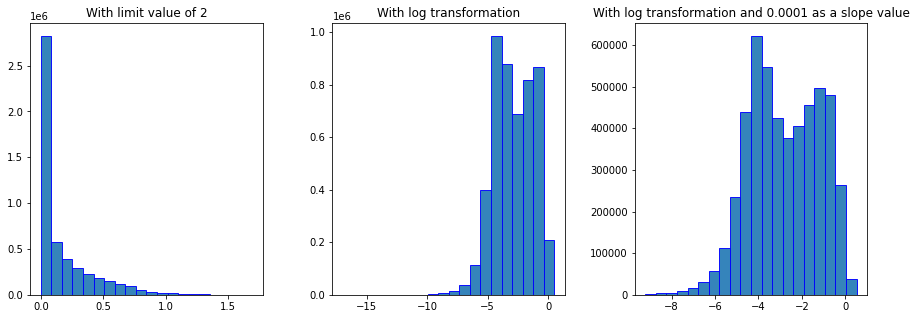

In [65]:
plot_transformations(data, column, min_value, limit_value=2, with_log_slope=True, slope=1e-4)

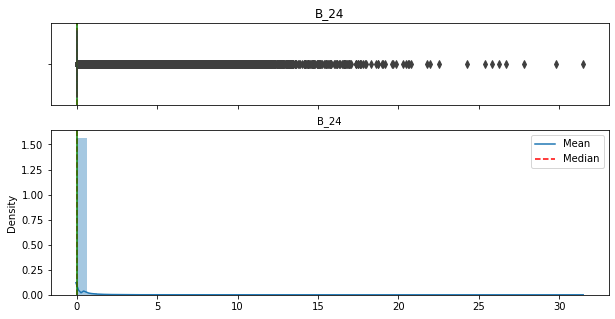

,count,mean,std,min,25%,50%,75%,max
B_24,5018442.0,0.038913,0.306026,1.820939e-09,0.002587,0.005174,0.007758,31.438585


20786

In [66]:
column = 'B_24'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [16]
With limit value of limit value of  20  that represent  3.1882404937628053e-06 % the data


,count,mean,std,min,25%,50%,75%,max
B_24,5018426.0,0.038837,0.30292,1.820939e-09,0.002587,0.005174,0.007758,19.872843


With log transformation


,count,mean,std,min,25%,50%,75%,max
B_24,5018442.0,-5.434128,1.355661,-20.123913,-5.957095,-5.264084,-4.859005,3.448036


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_24,5018442.0,-5.380075,1.27022,-9.210322,-5.919175,-5.244942,-4.846198,3.448039


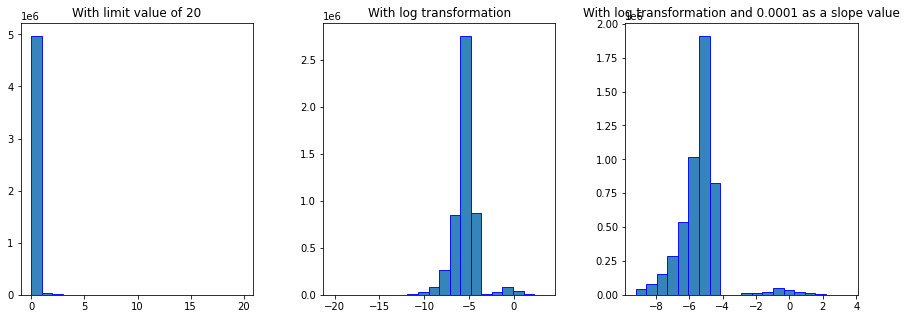

In [67]:
plot_transformations(data, column, min_value, limit_value=20, with_log_slope=True, slope=1e-4)

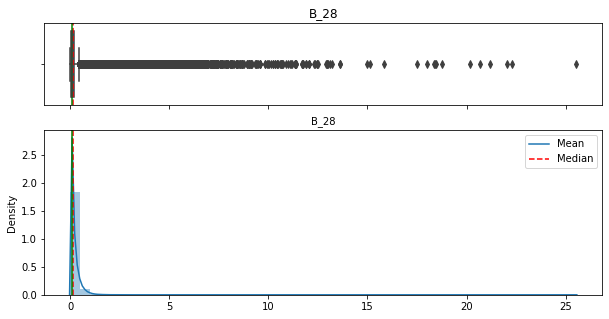

,count,mean,std,min,25%,50%,75%,max
B_28,5018442.0,0.157853,0.229913,-0.000021,0.027918,0.079077,0.200433,25.533373


21002

In [68]:
column = 'B_28'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [14]
With limit value of limit value of  15  that represent  2.7897104320424544e-06 % the data


,count,mean,std,min,25%,50%,75%,max
B_28,5018428.0,0.1578,0.227601,-0.000021,0.027918,0.079077,0.20043,14.989033


With log transformation and  0.0001211155966098886  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_28,5018442.0,-2.6433,1.392058,-9.447527,-3.574902,-2.536066,-1.606776,3.23999


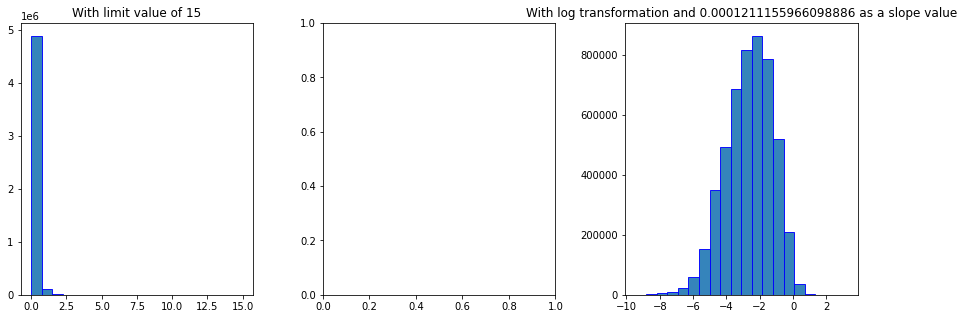

In [69]:
plot_transformations(data, column, min_value, limit_value=15, with_log_slope=True, slope=np.abs(min_value)+1e-4)

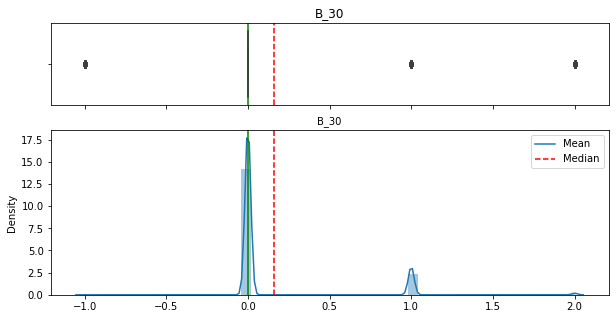

,count,mean,std,min,25%,50%,75%,max
B_30,5018442.0,0.15751,0.385625,-1.0,0.0,0.0,0.0,2.0


19869

In [70]:
column = 'B_30'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 3569750
correlation with 
          target     B_30
target  1.00000  0.37409
B_30    0.37409  1.00000
value counts:
  0    4267568
 1     710712
 2      39969
-1        193
Name: B_30, dtype: int64


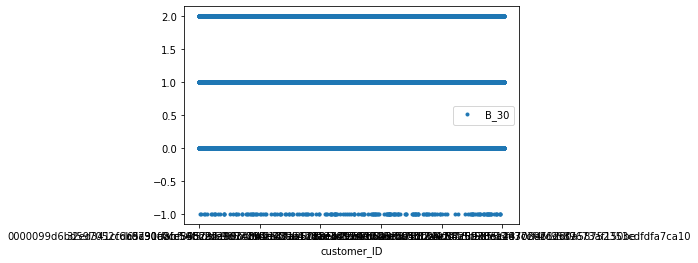

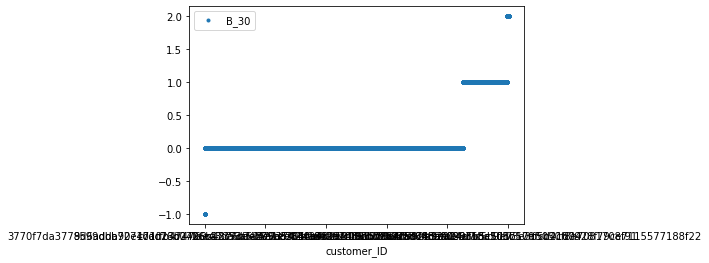

In [71]:
plot_discrete_data(data, column)

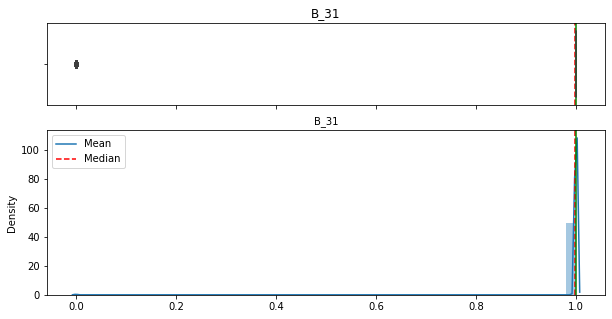

,count,mean,std,min,25%,50%,75%,max
B_31,5018442.0,0.997152,0.05329,0.0,1.0,1.0,1.0,1.0


15624

In [72]:
column = 'B_31'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 4159
correlation with 
           target      B_31
target  1.000000 -0.060437
B_31   -0.060437  1.000000
value counts:
 1    5004150
0      14292
Name: B_31, dtype: int64


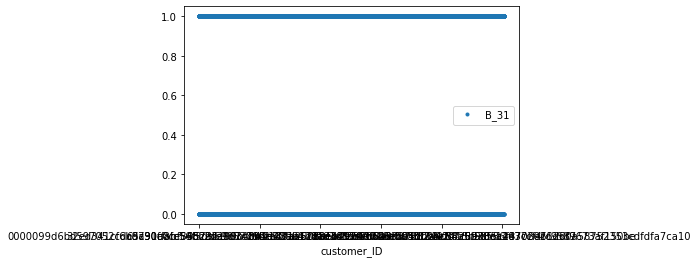

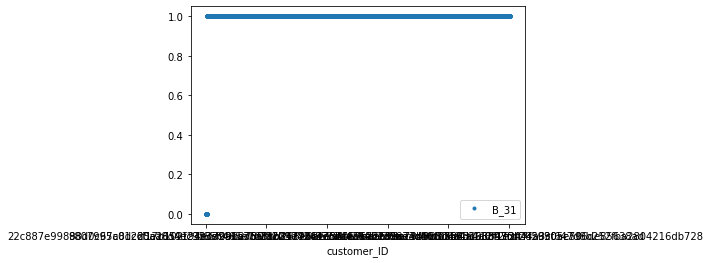

In [73]:
plot_discrete_data(data, column)

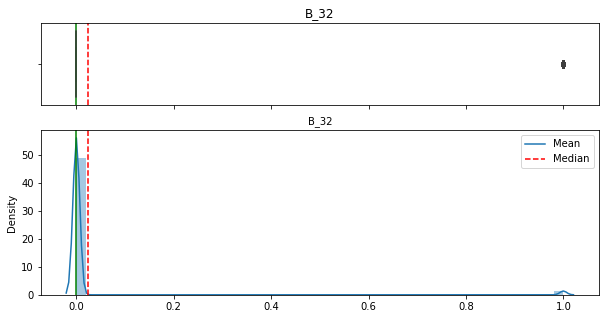

,count,mean,std,min,25%,50%,75%,max
B_32,5018442.0,0.023669,0.152015,0.0,0.0,0.0,0.0,1.0


15470

In [74]:
column = 'B_32'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 3800603
correlation with 
           target      B_32
target  1.000000  0.113769
B_32    0.113769  1.000000
value counts:
 0    4899661
1     118781
Name: B_32, dtype: int64


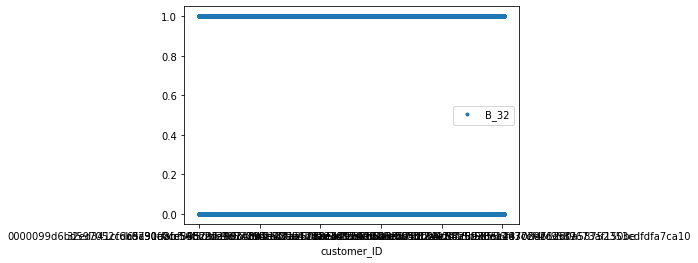

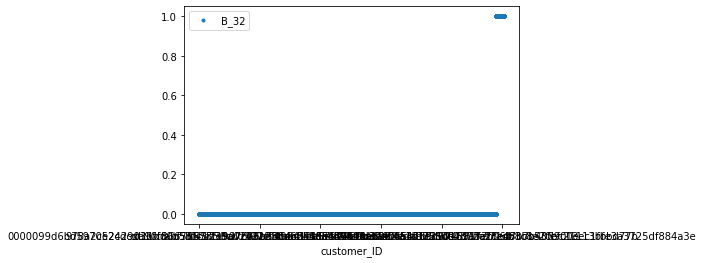

In [75]:
plot_discrete_data(data, column)

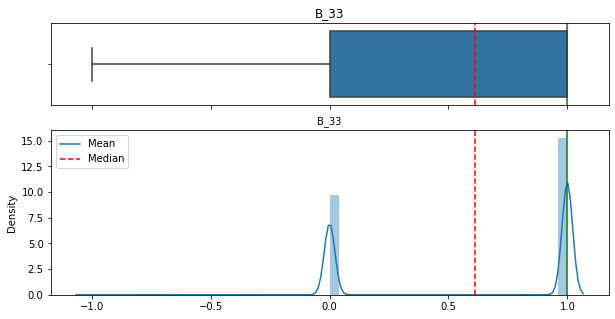

,count,mean,std,min,25%,50%,75%,max
B_33,5018442.0,0.611151,0.487568,-1.0,0.0,1.0,1.0,1.0


15392

In [76]:
column = 'B_33'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 1013919
correlation with 
           target      B_33
target  1.000000 -0.469691
B_33   -0.469691  1.000000
value counts:
  1    3067220
 0    1951029
-1        193
Name: B_33, dtype: int64


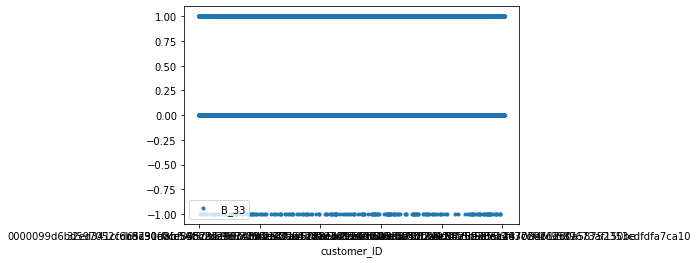

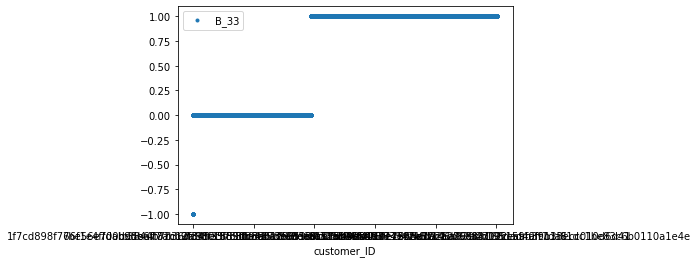

In [77]:
plot_discrete_data(data, column)

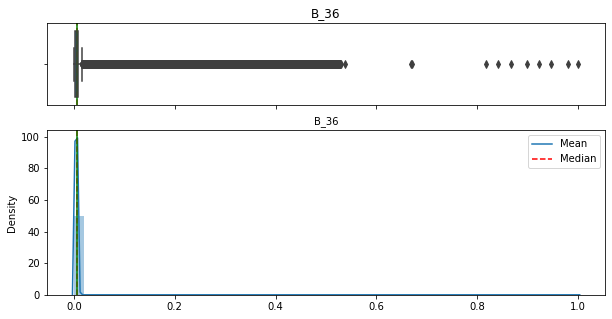

,count,mean,std,min,25%,50%,75%,max
B_36,5018442.0,0.006473,0.022081,1.160856e-09,0.002514,0.005032,0.007546,1.0


15946

In [78]:
column = 'B_36'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [10]
With limit value of limit value of  0.6  that represent  1.992650308601753e-06 % the data


,count,mean,std,min,25%,50%,75%,max
B_36,5018432.0,0.006471,0.022048,1.160856e-09,0.002514,0.005032,0.007546,0.537868


With log transformation


,count,mean,std,min,25%,50%,75%,max
B_36,5018442.0,-5.581512,1.047126,-20.574108,-5.985753,-5.292016,-4.886736,0.0


With log transformation and  0.0001  as a slope value


,count,mean,std,min,25%,50%,75%,max
B_36,5018442.0,-5.525562,0.937209,-9.210329,-5.946751,-5.272336,-4.873571,0.0001


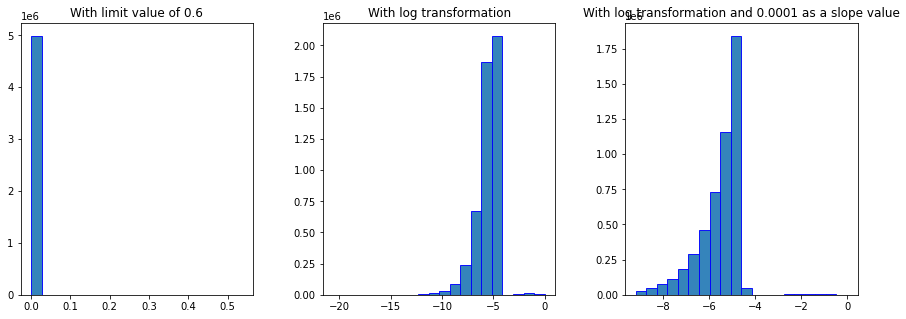

In [79]:
plot_transformations(data, column, min_value, limit_value=0.6, with_log_slope=True, slope=1e-4)

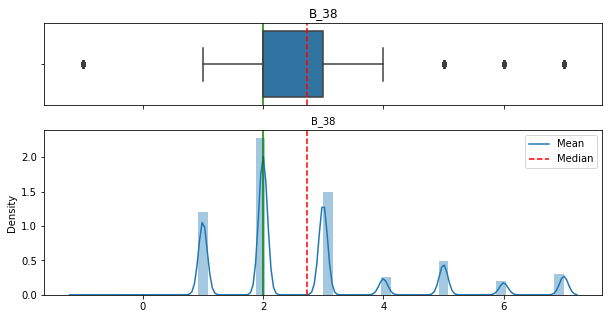

,count,mean,std,min,25%,50%,75%,max
B_38,5018442.0,2.738657,1.579232,-1.0,2.0,2.0,3.0,7.0


20720

In [80]:
column = 'B_38'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 0
correlation with 
           target      B_38
target  1.000000  0.422554
B_38    0.422554  1.000000
value counts:
  2    1832076
 3    1205128
 1     969548
 5     397627
 7     245246
 4     210850
 6     157774
-1        193
Name: B_38, dtype: int64


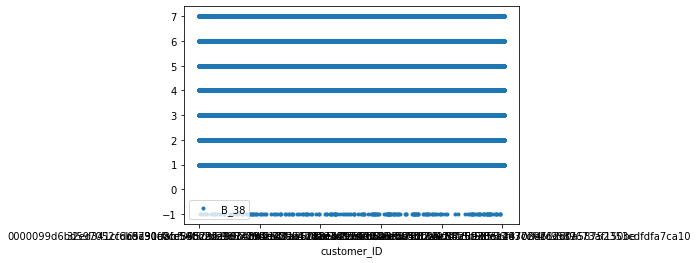

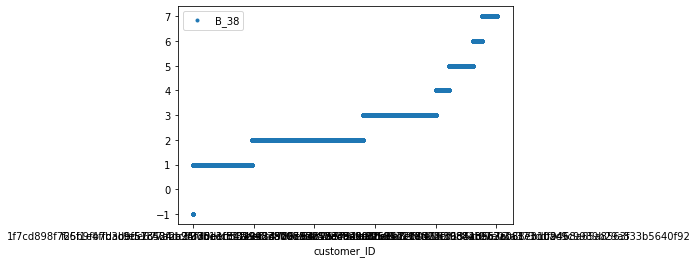

In [82]:
plot_discrete_data(data, column)

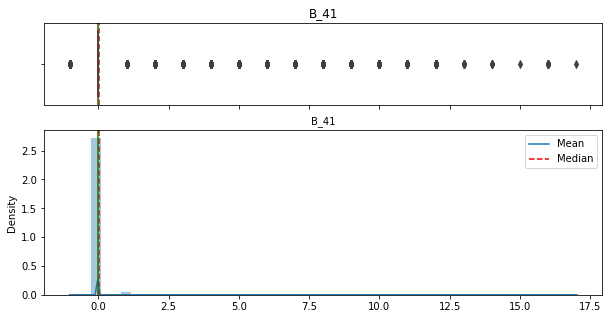

,count,mean,std,min,25%,50%,75%,max
B_41,5018442.0,0.026536,0.218619,-1.0,0.0,0.0,0.0,17.0


26576

In [83]:
column = 'B_41'
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)
gc.collect()

0s in the same position than the target 3806804
correlation with 
           target      B_41
target  1.000000  0.098027
B_41    0.098027  1.000000
value counts:
  0     4915289
 1       81921
 2       14779
 3        3539
 4        1182
-1         658
 5         499
 6         239
 7          96
 8          79
 10         48
 9          35
 12         33
 11         22
 16         10
 13          7
 14          4
 15          1
 17          1
Name: B_41, dtype: int64


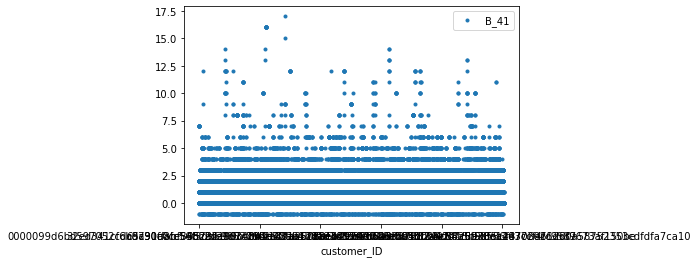

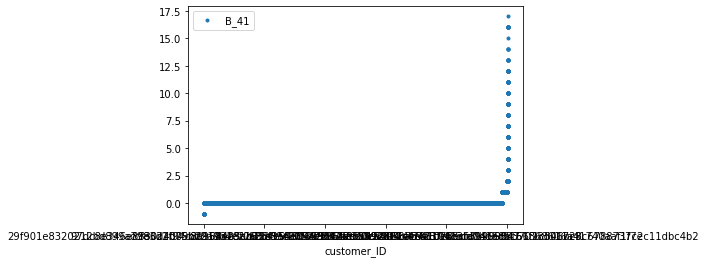

In [84]:
plot_discrete_data(data, column)